# Lab 1: Python Pandas

INFO 371 Spring 2018

Lab created by: Christie Gan

Deadline: 4/4/18 11:59PM

Last Edit: 3/31/2018

DataFrames are two-dimensional data structures with columns that can have different data types, similar to a spreadsheet. This structure is very commonly used in data manipulation due to its flexibility. It can give summary statistics about the overall data, can be separated, joined, and added to. 

To begin, import the python, matplotlib, and numpy. 

In [27]:
#your code here
import IPython
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Pandas Basics

There are several different ways to create a brand new dataframe, depending on the data you want to put in it. In some situations, a dataset is given to you. In some other cases, you have to insert in the data yourself. 

#### 1.) Create a brand new 5x5 dataframe where you are inserting the data values one by one manually, and have indices default generated. Make up the data values, and print it.

In [2]:
#your code here
df = pd.DataFrame(np.nan, index=[np.nan,np.nan,np.nan,np.nan, np.nan], columns=[np.nan,np.nan,np.nan,np.nan, np.nan])
df

,nan,nan,nan,nan,nan
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN


#### 2.) Create a new 5x5 dataframe by inserting a Series object for each column. The Series objects should have alphabetical indices (a, b, c, etc). You should have 5 Series total. Make up the data values, and print it.

In [3]:
#your code here
s1 = pd.Series([1, 2, 3, 4, 5])
s2 = pd.Series([6, 7, 8, 9, 10])
s3 = pd.Series([11, 12, 13, 14, 15])
s4 = pd.Series([16, 17, 18, 19, 20])
s5 = pd.Series([21, 22, 23, 24, 25])
df = pd.DataFrame([list(s1), list(s2), list(s3), list(s4), list(s5)], index=["a", "b", "c", "d", "e"], columns=["a", "b", "c", "d", "e"])
df

,a,b,c,d,e
a,1,2,3,4,5
b,6,7,8,9,10
c,11,12,13,14,15
d,16,17,18,19,20
e,21,22,23,24,25


But the most common way to create a dataframe in pandas is to just read in your dataset. This usually automatically converts the dataset into a dataframe. Test it by using df_name.head(). This should show the first five rows of the dataframe. 

#### 3.) Create a new dataframe by reading in the yrbs.tsv.bz2 dataset provided in Files on Canvas.

In [4]:
#your code here
df = pd.read_csv('yrbs.tsv',delimiter='\t',encoding='utf-8')
df.head()

,year,age,sex,meth,tv,state
0,2003,13,M,0,1,XX
1,2003,13,M,1,1,XX
2,2003,13,M,1,1,XX
3,2003,13,M,0,1,XX
4,2003,13,M,0,0,XX


#### 4.) What are the dimensions of this dataframe? What are the datatypes of the values in each column? (print it out based on the dataframe's properties)

In [5]:
#your code here
print(df.shape)
print(df.dtypes)

(58077, 6)
year      int64
age       int64
sex      object
meth      int64
tv        int64
state    object
dtype: object


#### 5.) Add a new column to the dataframe in Question 3 with random data values. Print out the first ten rows, then drop the new column. Print the first ten rows out again 

In [6]:
#your code here
df1 = df.assign(random=pd.Series(np.random.randn(len(df["year"]))).values)
display(df1.head(10))
df1 = df1.drop(['random'], axis=1)
display(df1.head(10))

,year,age,sex,meth,tv,state,random
0,2003,13,M,0,1,XX,0.784797
1,2003,13,M,1,1,XX,0.015703
2,2003,13,M,1,1,XX,1.128741
3,2003,13,M,0,1,XX,-0.911122
4,2003,13,M,0,0,XX,0.065319
5,2003,13,M,0,1,XX,-1.778958
6,2003,13,M,0,0,XX,0.045914
7,2003,14,M,0,1,XX,-0.952893
8,2003,14,M,0,1,XX,-0.712170
9,2003,14,M,0,1,XX,1.403472


,year,age,sex,meth,tv,state
0,2003,13,M,0,1,XX
1,2003,13,M,1,1,XX
2,2003,13,M,1,1,XX
3,2003,13,M,0,1,XX
4,2003,13,M,0,0,XX
5,2003,13,M,0,1,XX
6,2003,13,M,0,0,XX
7,2003,14,M,0,1,XX
8,2003,14,M,0,1,XX
9,2003,14,M,0,1,XX


#### 6.) Display a table of summary statistics (mean, std, min, max) 

In [7]:
#your code here
df.describe()

,year,age,meth,tv
count,58077.000000,58077.000000,58077.000000,58077.000000
mean,2006.037416,15.796047,0.051105,0.603148
std,2.247649,0.999958,0.220213,0.489249
min,2003.000000,13.000000,0.000000,0.000000
25%,2005.000000,15.000000,0.000000,0.000000
50%,2007.000000,16.000000,0.000000,1.000000
75%,2009.000000,17.000000,0.000000,1.000000
max,2009.000000,17.000000,1.000000,1.000000


#### 7.) Create a sub dataframe from the existing dataframe by selecting the fifth column (tv) and the third to tenth row by index of the dataframe

In [8]:
#your code here
dfs = df.iloc[3:11,4]
dfs

3     1
4     0
5     1
6     0
7     1
8     1
9     1
10    1
Name: tv, dtype: int64

## Matplotlib Basics

Matplotlib is Python's 2d plotting library. The labels, axes, size, points, color, and content can be customized. It also has a pylab mode that emulates matlab graphics.

#### 8.) Create a line graph of two trends in the original dataframe: the average meth usage in Montana over the years and the average meth usage in any of the other states (denoted as XX) over the years. Make the two lines different colors, and label them accordingly. 

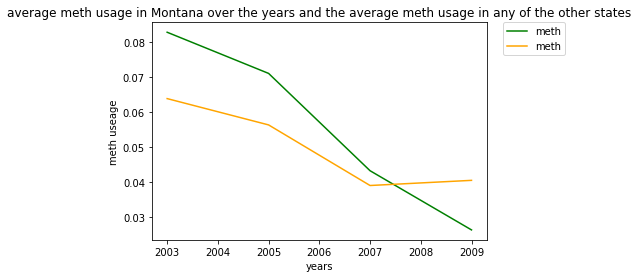

In [42]:
#your code here
mt = df[df["state"] == "MT"].groupby("year")
mtkeys = mt.groups.keys()
mtAve = mt["meth"].mean()
xx = df[df["state"] == "XX"].groupby("year")
xxkeys = xx.groups.keys()
xxAve = xx["meth"].mean()
#print(mtAve)
plt.plot(mtkeys, mtAve, color='g')
plt.plot(xxkeys, xxAve, color='orange')
plt.xlabel('years')
plt.ylabel('meth useage')
plt.title('average meth usage in Montana over the years and the average meth usage in any of the other states')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()